In [1]:
import pandas as pd

In [50]:
data = { 
'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 
'Overcast', 'Sunny', 
'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 
'Rain'], 
'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 
'Mild', 
'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'], 
'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 
'Normal', 'High', 
'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'], 
'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 
'Strong', 'Weak', 
'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'], 
'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'] 
} 
df = pd.DataFrame(data)

In [72]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


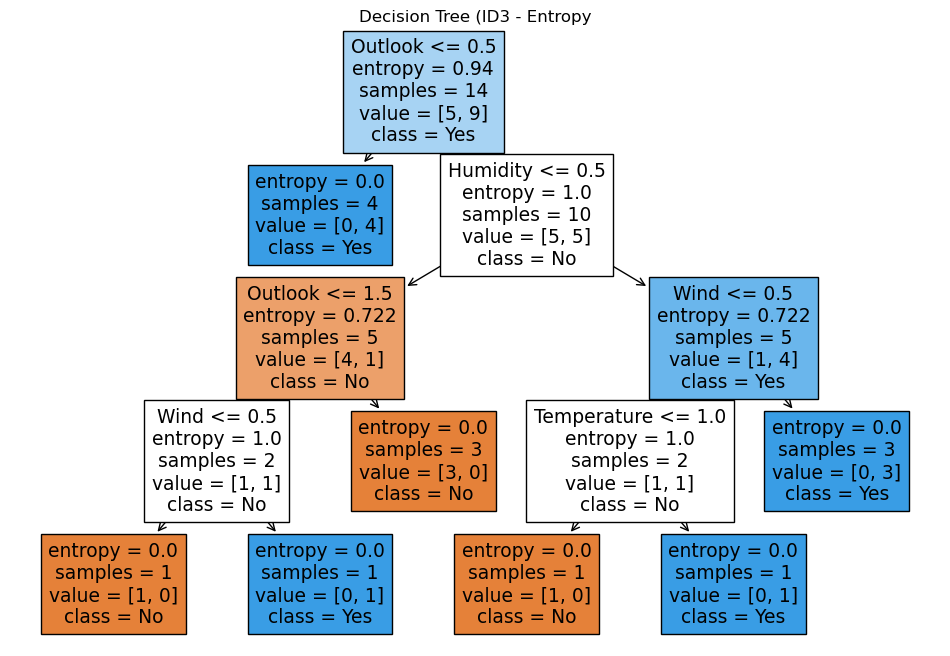

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_encoded = df.copy()
label_encoders = {}

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df[column])
        label_encoders[column] = le

X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']


model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=label_encoders['PlayTennis'].classes_, filled=True)
plt.title("Decision Tree (ID3 - Entropy")
plt.show()

In [82]:
X


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [84]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayTennis, dtype: int32

In [88]:
X.head

<bound method NDFrame.head of     Outlook  Temperature  Humidity  Wind
0         2            1         0     1
1         2            1         0     0
2         0            1         0     1
3         1            2         0     1
4         1            0         1     1
5         1            0         1     0
6         0            0         1     0
7         2            2         0     1
8         2            0         1     1
9         1            2         1     1
10        2            2         1     0
11        0            2         0     0
12        0            1         1     1
13        1            2         0     0>

In [90]:
y.tail

<bound method NDFrame.tail of 0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayTennis, dtype: int32>